<a href="https://colab.research.google.com/github/NicoRota-0/BIS-project/blob/main/BIS_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pm4py

In [58]:
import pandas as pd
import pm4py
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.filtering.log.timestamp import timestamp_filter
from pm4py.algo.filtering.log.start_activities import start_activities_filter
from pm4py.algo.filtering.log.attributes import attributes_filter

In [2]:
PATH = 'drive/MyDrive/BIS_files/'

In [67]:
def load_filter_log(file_name, date1 = "2018-01-01 00:00:00", date2 = "2019-12-31 23:59:59"):
  """This function loads and filter a log from a xes file,
  the filter eliminates all the cases with events outside the interval
  defined by the two timestamp in input.
  """
  tmp_log = xes_importer.apply(PATH + file_name + '.xes')

  activities_all = attributes_filter.get_attribute_values(tmp_log, "id")
  list_activities_id_all = len(list(activities_all))

  # filtering all the events happened/started in 2017
  filtered_log = timestamp_filter.filter_traces_contained(tmp_log, date1, date2)

  activities_all = attributes_filter.get_attribute_values(filtered_log, "id")
  
  list_activities_id_filt = len(list(activities_all))

  print(file_name + ' Data Before filtering:', str(list_activities_id_all), 'Cases;', str(len(tmp_log)), 'Events.')
  print(file_name + ' Data After filtering:', str(list_activities_id_filt), 'Cases;', str(len(filtered_log)), 'Events.')
  
  return filtered_log

**Loading and Filtering Events that started in 2017**

In [68]:
domesticDeclarations = load_filtered_log_by_date('DomesticDeclarations')
internationalDeclarations = load_filtered_log_by_date('InternationalDeclarations')
permitLog = load_filtered_log_by_date('PermitLog')
prepaidTravelCost = load_filtered_log_by_date('PrepaidTravelCost')
requestForPayment = load_filtered_log_by_date('RequestForPayment')

parsing log, completed traces ::   0%|          | 0/10500 [00:00<?, ?it/s]

DomesticDeclarations Data Before filtering: 56437 Cases; 10500 Events.
DomesticDeclarations Data After filtering: 46375 Cases; 8260 Events.


parsing log, completed traces ::   0%|          | 0/6449 [00:00<?, ?it/s]

InternationalDeclarations Data Before filtering: 69073 Cases; 6449 Events.
InternationalDeclarations Data After filtering: 55576 Cases; 4951 Events.


parsing log, completed traces ::   0%|          | 0/7065 [00:00<?, ?it/s]

PermitLog Data Before filtering: 86581 Cases; 7065 Events.
PermitLog Data After filtering: 71063 Cases; 5596 Events.


parsing log, completed traces ::   0%|          | 0/2099 [00:00<?, ?it/s]

PrepaidTravelCost Data Before filtering: 16205 Cases; 2099 Events.
PrepaidTravelCost Data After filtering: 14024 Cases; 1776 Events.


parsing log, completed traces ::   0%|          | 0/6886 [00:00<?, ?it/s]

RequestForPayment Data Before filtering: 36796 Cases; 6886 Events.
RequestForPayment Data After filtering: 31820 Cases; 5778 Events.


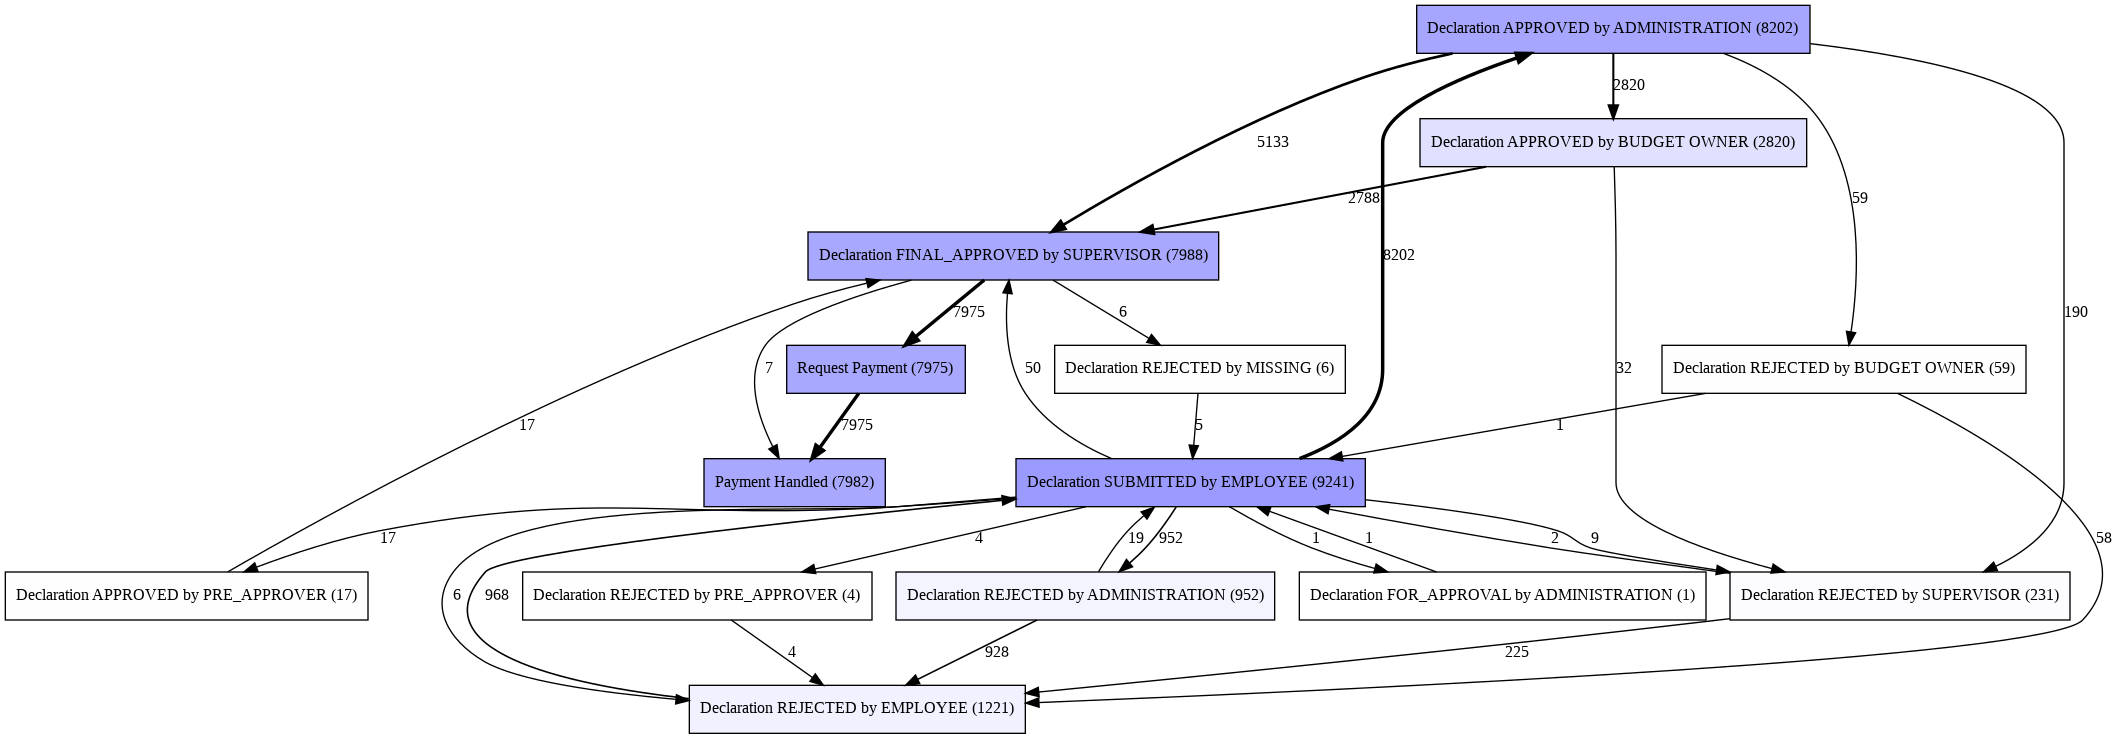

In [73]:
## Import the dfg_discovery algorithm
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
## Import the dfg visualization object
from pm4py.visualization.dfg import visualizer as dfg_visualization
#Create graph from log
dfg = dfg_discovery.apply(filtered_log)
# Visualise
gviz = dfg_visualization.apply(dfg, log=filtered_log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)